# Projet de Classification non Supervisée
#### BIDART Julen - BUISSON Zacharie - GUILLET Thomas

## Partie 1 : Affichage des signatures

In [1]:
#Liste de tous les imports nécéssaires

import os
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

In [2]:
#Code intermédiaire qui permet de partitionner les mots d'une ligne, séparés d'un caractère donné
def separe_espace(chaine,caractere):
    liste_mot=[]
    chaine_actuelle=""
    for i in chaine:
        if i == caractere:
            liste_mot+=[float(chaine_actuelle)]
            chaine_actuelle=""
        else:
            chaine_actuelle+=i
    if chaine_actuelle != "":
        liste_mot+=[chaine_actuelle]
    return liste_mot

In [3]:
separe_espace("30 2012 65596 5"," ")

[30.0, 2012.0, 65596.0, '5']

In [4]:
def visualise_signature_i(numero_signature):
    liste_signature = os.listdir('Untitled Folder')
    liste_signature=liste_signature[1:] #On avait un fichier notebook checkpoint qui genait, on le retire
    #print(liste_signature)
    liste_entete = []
    bon_fichier = 1
    for numero_fichier in range(0,len(liste_signature)):
        entete = ""
        avant_v = False
        for caractere in liste_signature[numero_fichier]:
            if avant_v == False:
                if caractere == "v":
                    avant_v = True
                else:
                    entete += caractere
        liste_entete += [entete]
    #print(liste_entete)
    
    for indice_entetes in range(0,len(liste_entete)):
        if int(liste_entete[indice_entetes])== numero_signature:
            bon_fichier = liste_signature[indice_entetes]
            print(bon_fichier)        
    adresse_fichier = "Untitled Folder/"+bon_fichier
    
    fi = open(adresse_fichier,'r')
    
    liste_x = []
    liste_y = []
    liste_p = []
    liste_az = []
    liste_al = []
    
    line=fi.readline()
    while line:
        coordonnees_ligne=separe_espace(line," ")
        liste_x += [coordonnees_ligne[0]]
        liste_y += [coordonnees_ligne[1]]
        liste_p += [coordonnees_ligne[2]]
        liste_az += [coordonnees_ligne[3]]
        liste_al += [coordonnees_ligne[4]]
        line = fi.readline()
    fi.close()
    
    morceaux_x = []
    morceaux_y = []
    morceaux_actuel_x = []
    morceaux_actuel_y = []
    attente=False
    for i in range(0,len(liste_x)):
        if (liste_p[i] == 0) and (morceaux_actuel_x != []):
            morceaux_x += [morceaux_actuel_x]
            morceaux_y += [morceaux_actuel_y]
            morceaux_actuel_x = []
            morceaux_actuel_y = []
        elif (liste_p[i] == 0) and (morceaux_actuel_x == []):
            attente=True
        else:
            morceaux_actuel_x += [liste_x[i]]
            morceaux_actuel_y += [liste_y[i]]
    if (morceaux_actuel_x) != []:
        morceaux_x += [morceaux_actuel_x]
        morceaux_y += [morceaux_actuel_y]
    #print(morceaux_x,morceaux_y,len(morceaux_x))
    
    for i in range(0,len(morceaux_x)):
        plt.plot(morceaux_x[i],morceaux_y[i],'b')
    plt.show()
        
            
            

0v0.txt


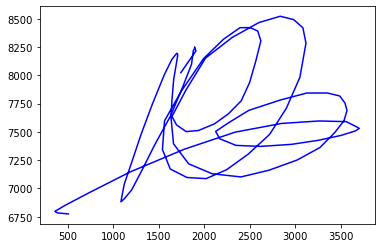

1v0.txt


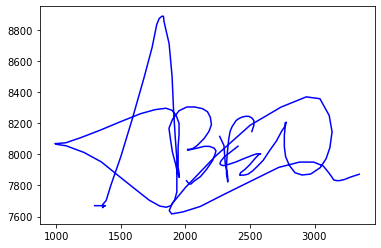

2v0.txt


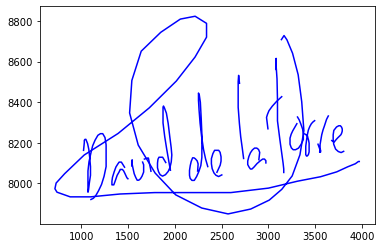

3v0.txt


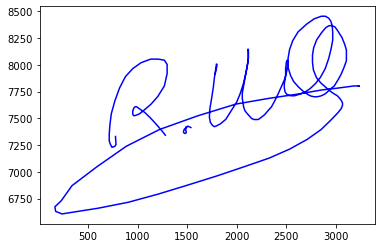

4v0.txt


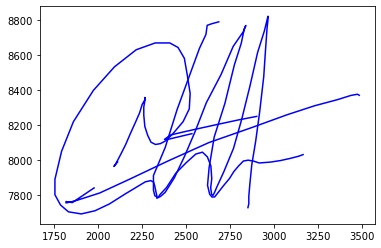

5v0.txt


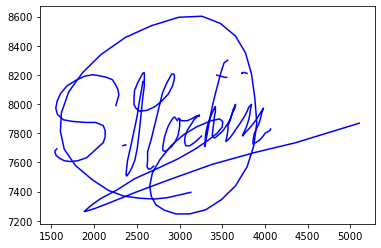

6v0.txt


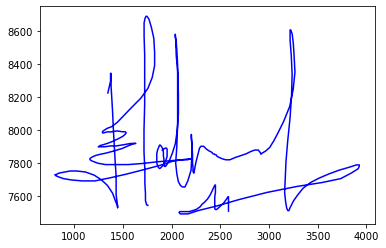

7v0.txt


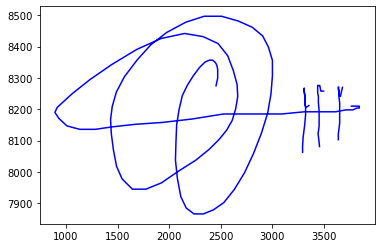

8v0.txt


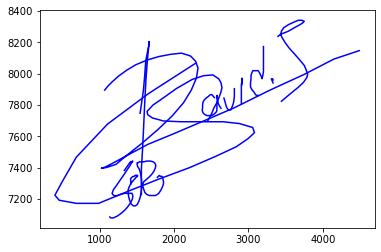

9v0.txt


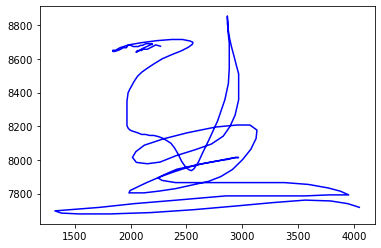

10v0.txt


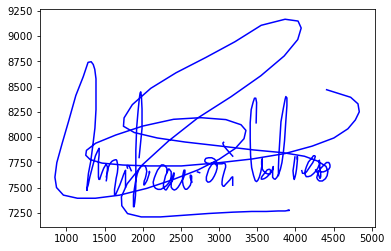

11v0.txt


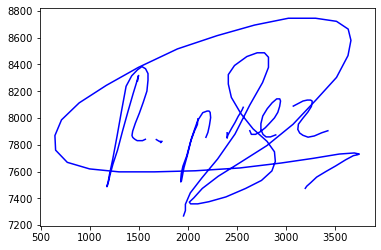

12v0.txt


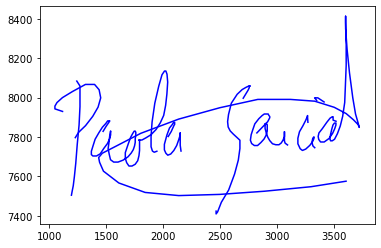

13v0.txt


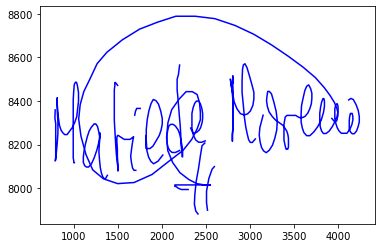

14v0.txt


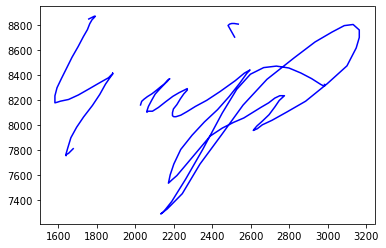

15v0.txt


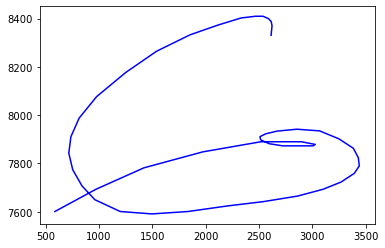

16v0.txt


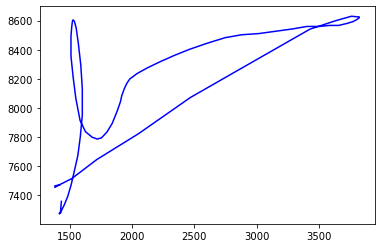

17v0.txt


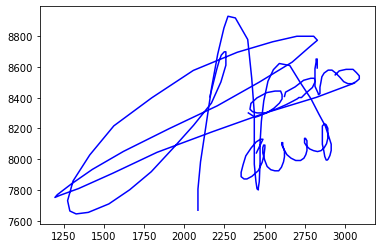

18v0.txt


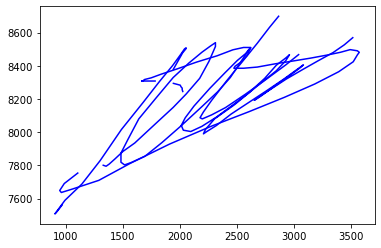

19v0.txt


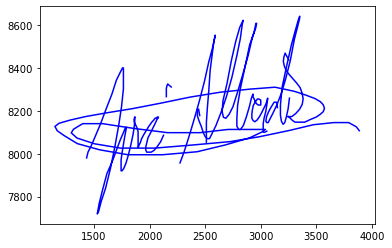

20v0.txt


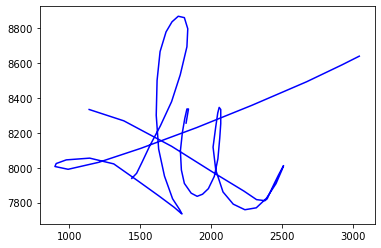

21v0.txt


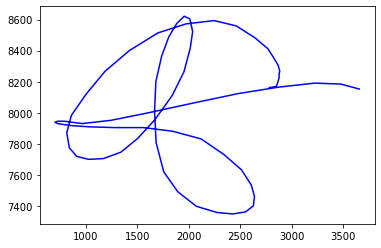

22v0.txt


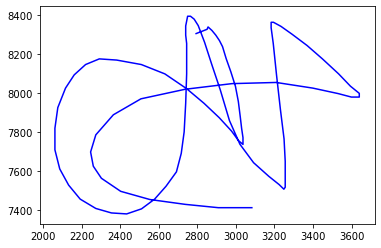

23v0.txt


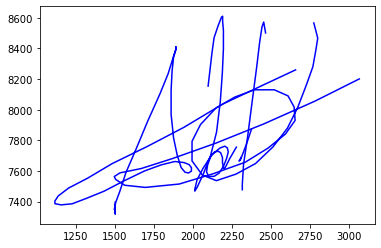

24v0.txt


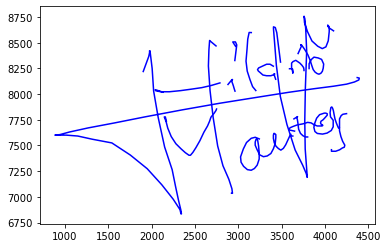

25v0.txt


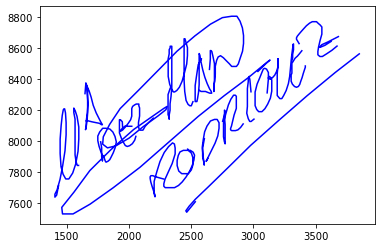

26v0.txt


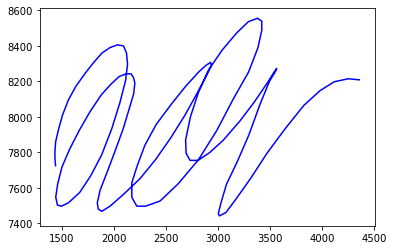

27v0.txt


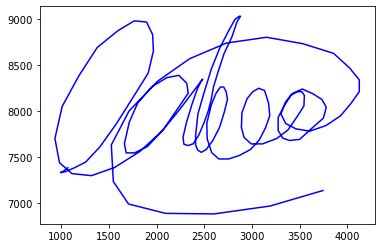

28v0.txt


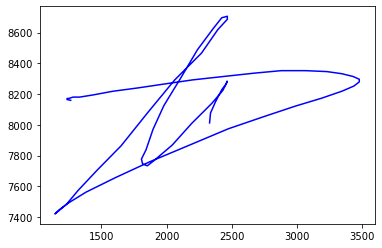

29v0.txt


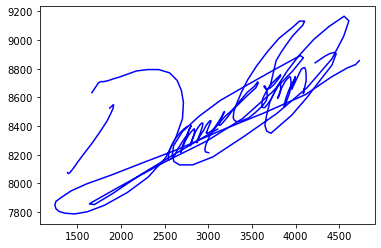

30v0.txt


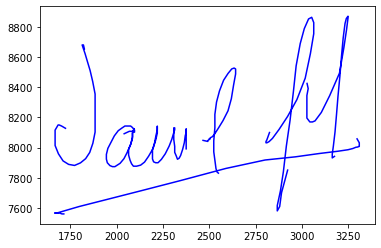

31v0.txt


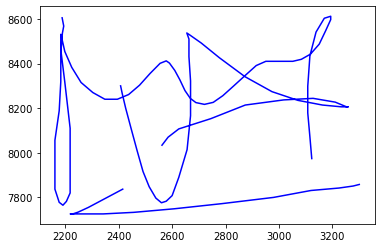

32v0.txt


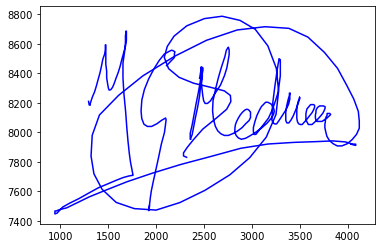

33v0.txt


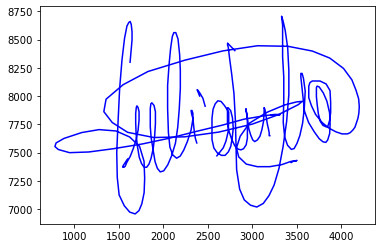

34v0.txt


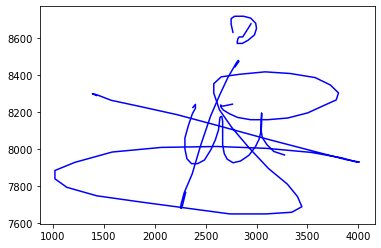

35v0.txt


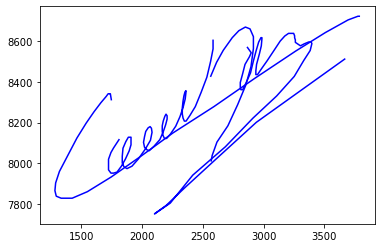

36v0.txt


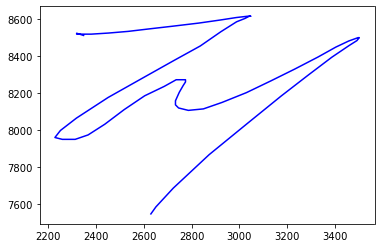

37v0.txt


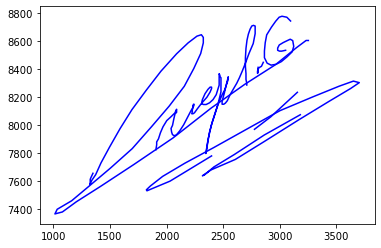

38v0.txt


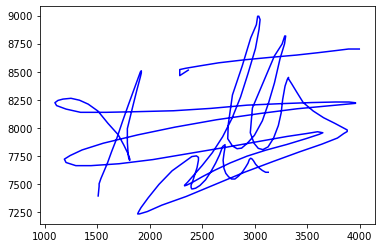

39v0.txt


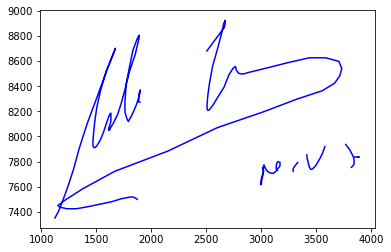

40v0.txt


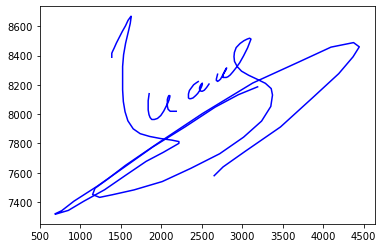

41v0.txt


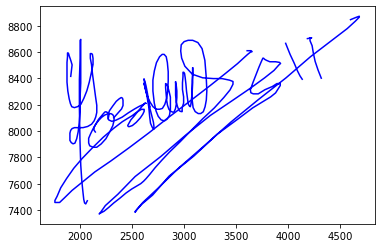

42v0.txt


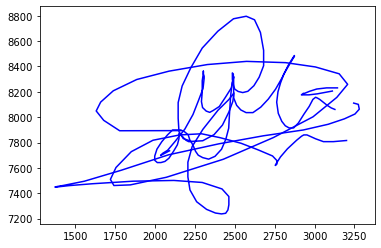

43v0.txt


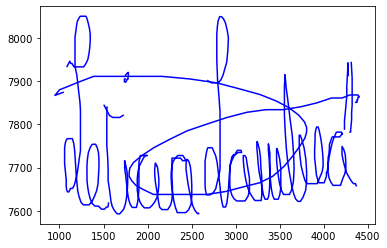

44v0.txt


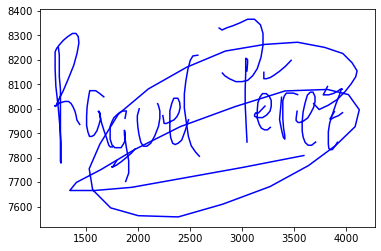

45v0.txt


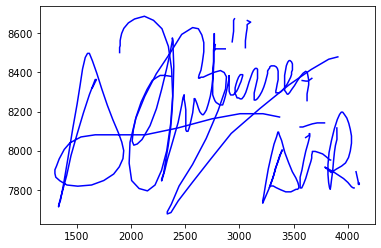

46v0.txt


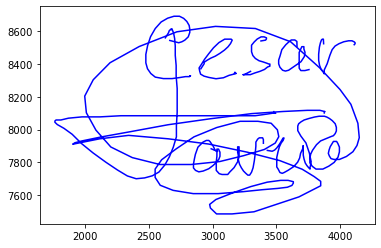

47v0.txt


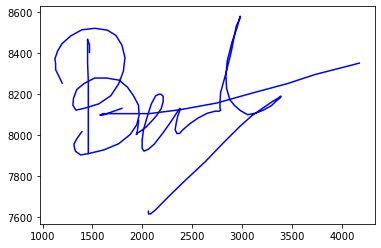

48v0.txt


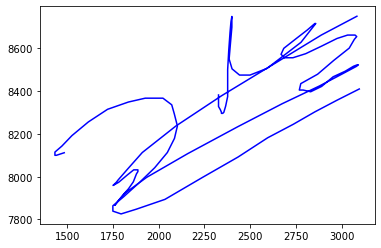

49v0.txt


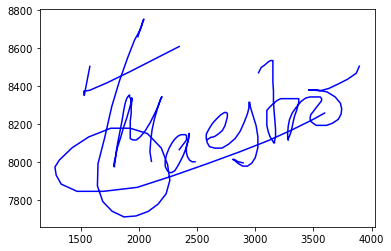

50v0.txt


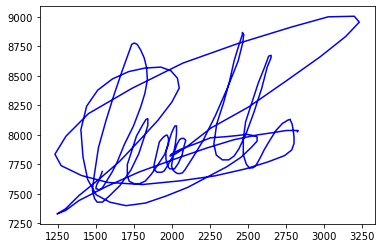

51v0.txt


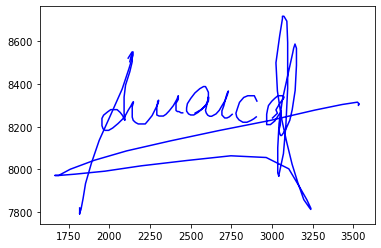

52v0.txt


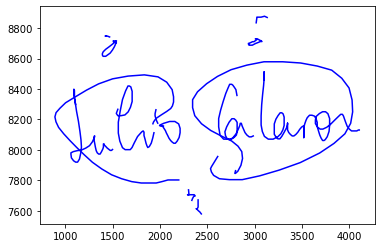

53v0.txt


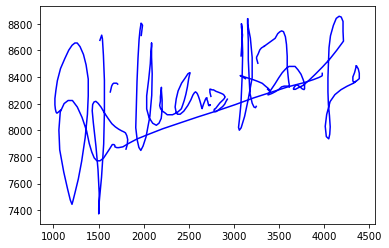

54v0.txt


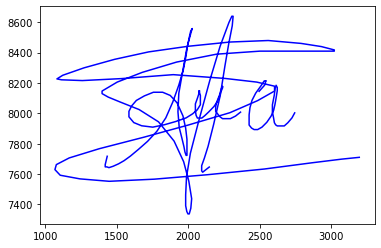

55v0.txt


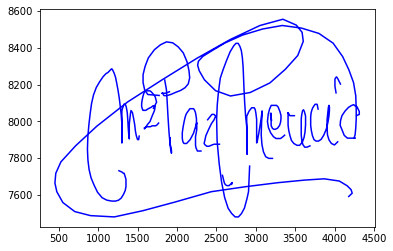

56v0.txt


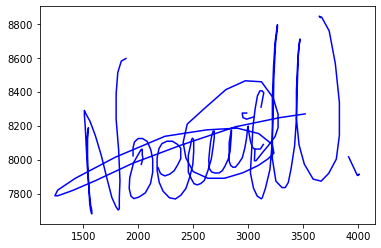

57v0.txt


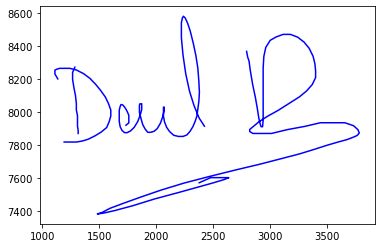

58v0.txt


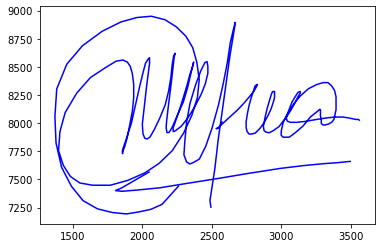

59v0.txt


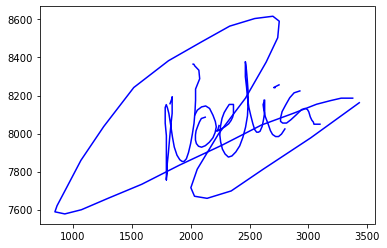

60v0.txt


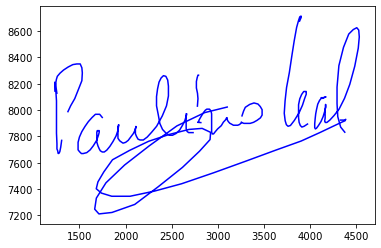

61v0.txt


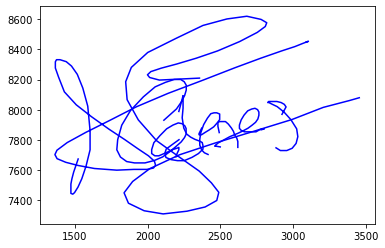

62v0.txt


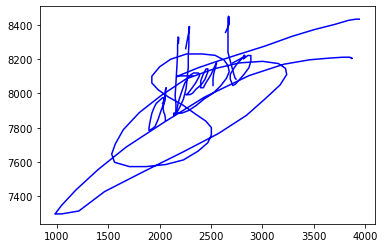

63v0.txt


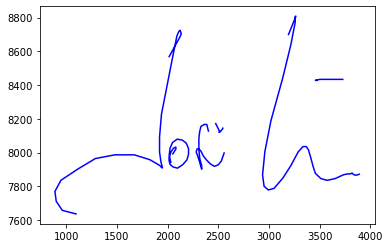

64v0.txt


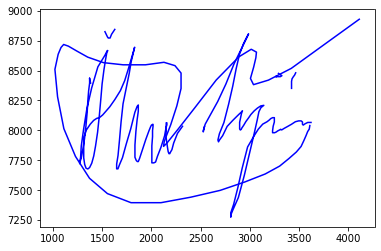

65v0.txt


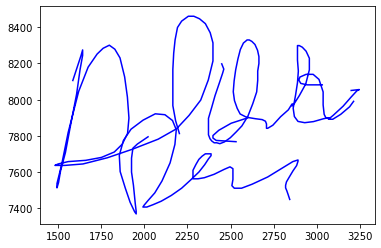

66v0.txt


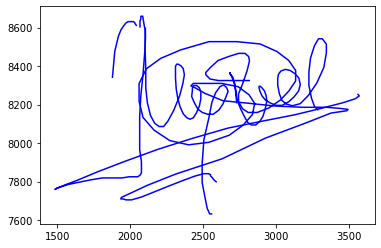

67v0.txt


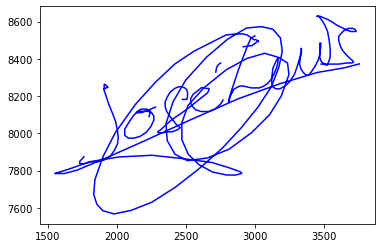

68v0.txt


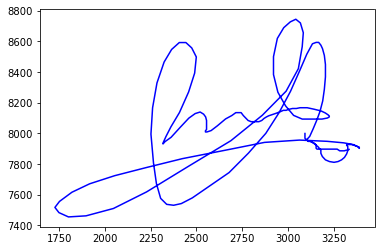

69v0.txt


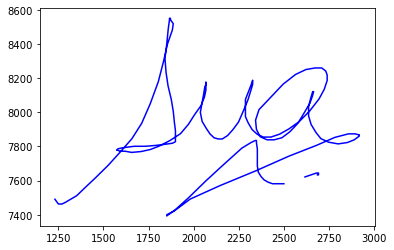

70v0.txt


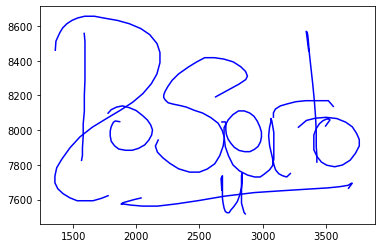

71v0.txt


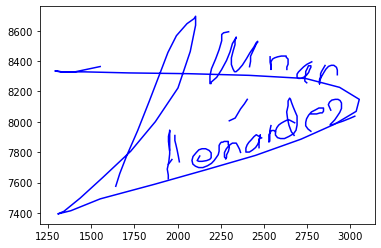

72v0.txt


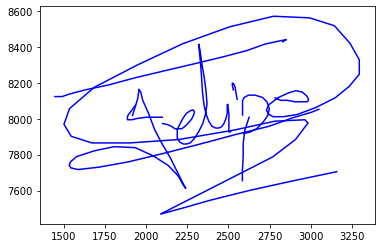

73v0.txt


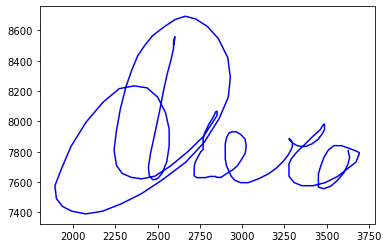

74v0.txt


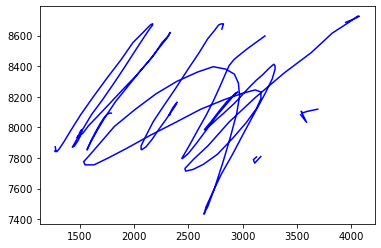

75v0.txt


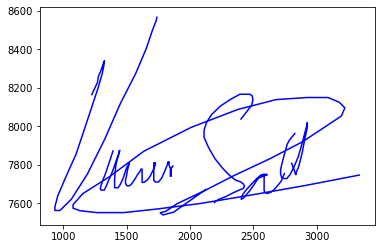

76v0.txt


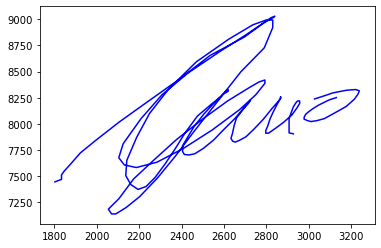

77v0.txt


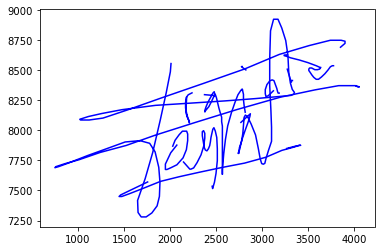

78v0.txt


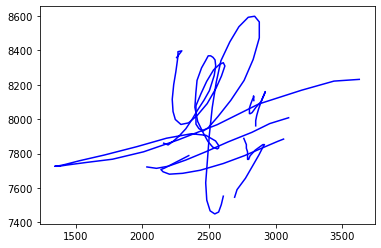

79v0.txt


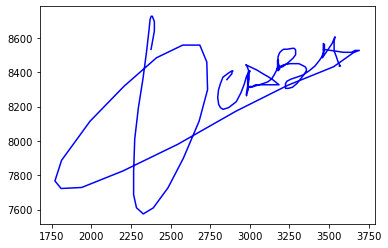

80v0.txt


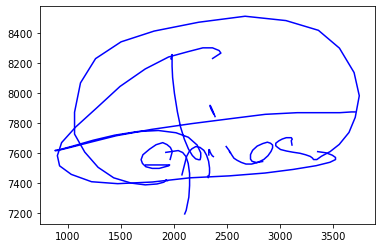

81v0.txt


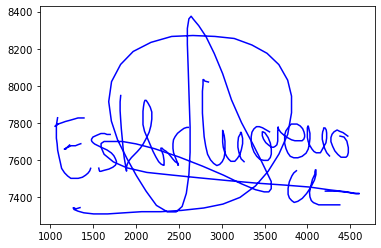

82v0.txt


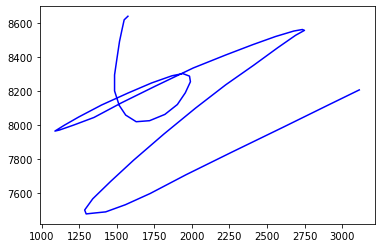

83v0.txt


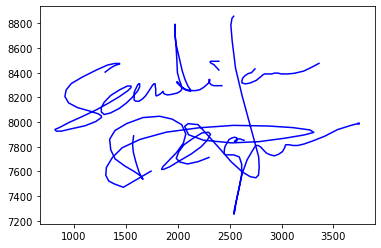

84v0.txt


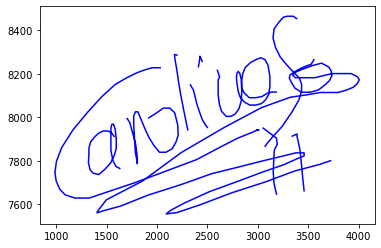

85v0.txt


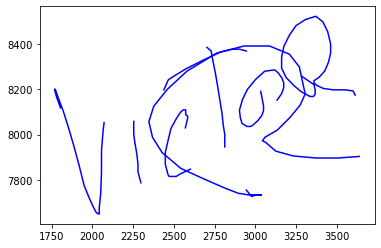

86v0.txt


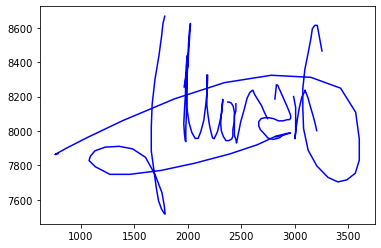

87v0.txt


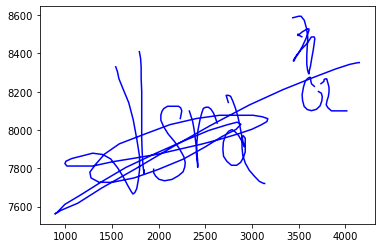

88v0.txt


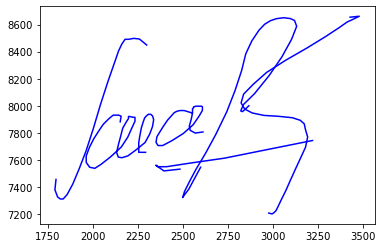

89v0.txt


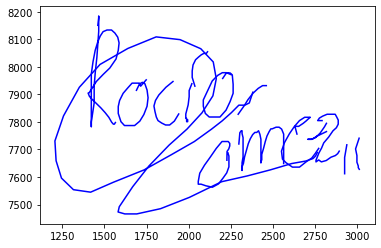

90v0.txt


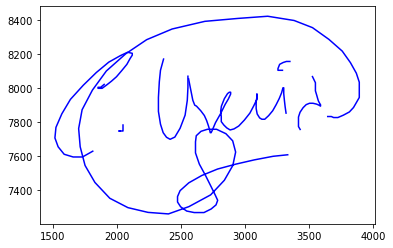

91v0.txt


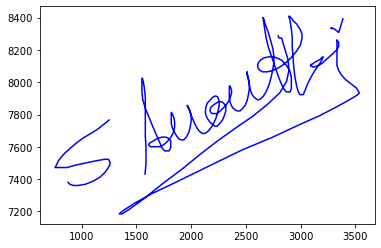

92v0.txt


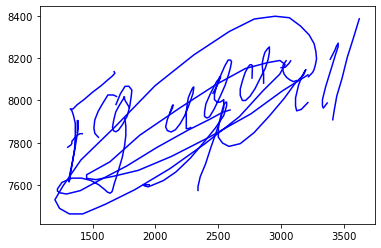

93v0.txt


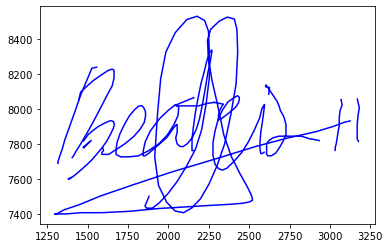

94v0.txt


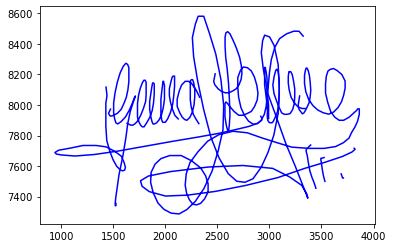

95v0.txt


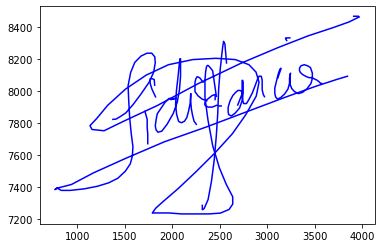

96v0.txt


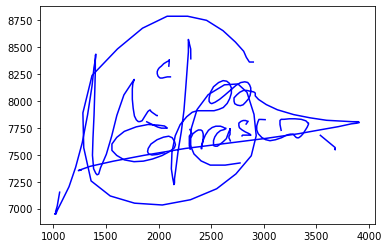

97v0.txt


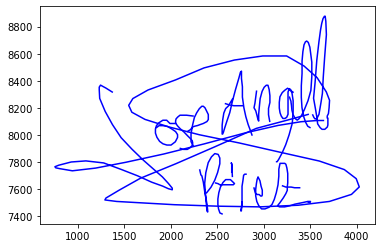

98v0.txt


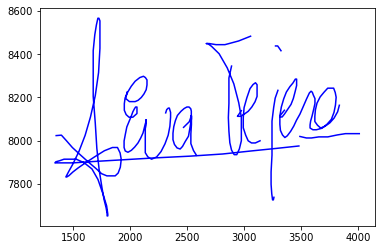

99v0.txt


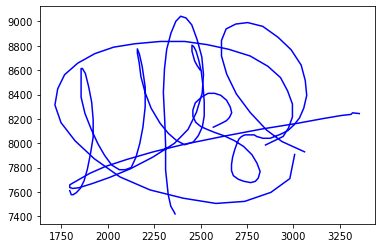

In [5]:
for i in range(0,len(os.listdir('Untitled Folder'))-1):
    visualise_signature_i(i)


### Mesure de compléxité et catégorisation

In [6]:
#Code intermédiaire qui permet de partitionner les mots d'une ligne, séparés d'un caractère donné
def separe_espace2(chaine,caractere):
    liste_mot=[]
    chaine_actuelle=""
    for i in chaine:
        if i == caractere:
            liste_mot+=[chaine_actuelle]
            chaine_actuelle=""
        else:
            chaine_actuelle+=i
    if chaine_actuelle != "":
        liste_mot+=[chaine_actuelle]
    return liste_mot#

In [7]:
#Question 1 : Mesure de complexité moyenne
#On suppose que l'on fait une moyenne empirique classique

def moyenne(liste):
    resu=0
    for i in liste:
        resu+=float(i.replace(',','.'))
    return resu/len(liste)

def moyenne2(liste):
    resu=0
    for i in range(0,len(liste)):
        resu += liste[i]
    if len(liste) == 0:
        return 0
    else:
        return resu/len(liste)

def moyenne_fichier(fichier):
    adresse_fichier="Untitled Folder 1/"+fichier
    fi=open(adresse_fichier, 'r')
    line=fi.readline()
    resu=[]
    while line:
        valeur_ligne=separe_espace2(line, "	")
        resu+=[moyenne(valeur_ligne)]
        line=fi.readline()
    return resu


#### Tests du code : Retirer les Mots-dièse.

In [8]:
#moyenne_fichier("Complexité avec 4G (100x25).txt")

In [9]:
#moyenne_fichier("Complexité avec 8G (100x25).txt")

In [10]:
#moyenne_fichier("Complexité avec 24G (100x25).txt")

## Partie 2 : Clustering

### Préliminaires à propos des données

Dans cette partie, on se propose d'étudier la repartition en catégories des différentes valeurs de compléxité moyenne des signatures. Pour, on nous suggère de regarder les moyennes, et d'appliquer différentes méthodes et analyses pour tirer des conclusions de cela.

Déjà, on peut noter que ces données sont en dimension 1 : on n'a qu'une seule variable par signature, qui est la moyenne de compléxité, et ceci simplifie l'analyse.

Ensuite, on peut voir que les 3 analyses se font par rapport à un certain nombre de gaussiennes, et ceci va faire fluctuer les valeurs des moyennes : l'analyse sera donc faite 3 fois, mais les exécutions seront laissées en commentaire, pour un soucis de clarté du NoteBook.

### Méthode n°1 : Regroupement Hiérarchique Ascendant

#### Codage du Modèle

In [11]:
#Méthodes de Regroupement Hiérarchique Ascendant

def liste_singleton(n):
    resu = []
    for i in range(0,n):
        resu += [[i]]
    return resu

def distance_min_ensemble(A,B):
    resu = float('inf')
    for a in A:
        for b in B:
            distance = abs(b-a)
            if resu > distance:
                resu = distance
    return resu

def regroupement_hierarchique_ascendant(liste_moyenne,nombre_de_classe):
    classes = []
    for i in liste_moyenne:
        classes += [[i]]
    while len(classes) > nombre_de_classe:
        classe_a_changer_a = []
        classe_a_changer_b = []
        n = len(classes)
        distance_min = float('inf')
        for indice_element_a in range(0,n):
            for indice_element_b in range(0,n):
                dist = distance_min_ensemble(classes[indice_element_a], classes[indice_element_b])
                if (dist < distance_min) and (classes[indice_element_a] != classes[indice_element_b]):
                    distance_min = dist
                    classe_a_changer_a = classes[indice_element_a]
                    classe_a_changer_b = classes[indice_element_b]
        nouvelle_classe = classe_a_changer_b + classe_a_changer_a
        classes.remove(classe_a_changer_a)
        classes.remove(classe_a_changer_b)
        classes += [nouvelle_classe]
        #print(distance_min)
    return classes
        
                    
                

In [12]:
RHA_4G=regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 4G (100x25).txt"),3)
print(RHA_4G)

[[26.228741702200324], [32.55400176844401, 32.36275580474817, 30.139247700684493, 30.176654833594043, 30.288628258717235, 30.291925182655067, 30.27497465855616, 30.249930068087266, 30.250151109488634, 30.22229146143609, 30.35885890536677, 30.44454630352153, 30.58841245529803, 30.606420078815123, 30.541863624564193, 30.86449253047869, 30.88091648654532, 30.93098229860708, 30.935473287697267, 30.91766267677355, 30.79288976532355, 30.800599129785542, 30.825713143899147, 30.71014834930447, 30.69617471670327, 30.67392126278407, 30.741485378786003, 30.74961785835811, 31.105139149734505, 31.04646349151155, 29.95141436333159, 29.91450697066494, 30.006485104615994, 29.999601097188744, 30.014607742194922, 30.019359351026388, 29.307611732347585, 29.29526174081145, 29.338845400475297, 29.3801508945898, 29.467351777854322, 29.462412217232615, 29.738415620212155, 29.767421165412202, 29.68896840006529, 29.698077605935932, 29.70810765297654, 29.636952204628727, 29.635858726474556, 29.639517608100906, 

In [13]:
RHA_8G=regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 8G (100x25).txt"),3)
print(RHA_8G)

[[31.164519344200727, 31.110618627789705, 31.042660322773735, 31.31050671408981, 30.86583204044705, 30.86912787216303, 30.43739287179681, 30.441246554125524, 30.38080698597798, 30.64319483914267, 30.629424258865452, 30.60882315826193, 30.6884241491514, 29.6180338972741, 29.563897944974656, 29.461547531198168, 29.476948485737974, 29.430505437190785, 29.43686318676432, 29.44605100638226, 29.409708084458334, 29.504791149760603, 29.815069315944807, 29.78863292609531, 29.879268759259276, 29.868673444781702, 29.693537072692184, 29.703407563592183, 29.729718865102267, 30.022643645607037, 30.011330263131075, 29.994122676004668, 29.97174009039632, 30.06406553343243, 29.211424859583904, 29.200066365342597, 29.12669283939138, 29.308351912074357, 29.30066134846927, 30.188007136867927, 27.129093394211186, 27.027749812644714, 27.2363744523915, 26.813331281210672, 26.774239419018354, 26.890284729892052, 26.683059158610654, 28.138503488364332, 28.13632420783082, 28.17254508541233, 28.081625460939186, 

In [14]:
RHA_24G=regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 24G (100x25).txt"),3)
print(RHA_24G)

[[15.410524216396533], [10.441122343239952, 10.200075586646918, 10.691393552624083, 11.08732210631063, 11.297201142422177, 12.460724515778946], [19.047779077533434, 19.336863422484964, 19.918445853819716, 19.930386434372682, 19.673326447619626, 20.39945731423201, 20.666880611769585, 26.765178728901102, 26.784423880715817, 26.713651335764208, 26.560266180082202, 26.588822296081954, 26.63131887886662, 26.446162467804466, 26.448592412043705, 26.422188098239914, 26.510414861088922, 26.48867267534084, 26.33076273590536, 26.322623337544655, 27.029171592493768, 27.046789095092986, 27.000096363514466, 26.995697666019296, 26.89118134417965, 26.901116724982742, 26.912119158133827, 26.93178143083273, 26.191366981805412, 26.198539658087135, 26.176614602934364, 25.998876443072824, 26.031977403974903, 25.914577438171683, 25.672672359046192, 25.672640885615, 25.571021571607265, 25.325113405607063, 25.293954966502135, 25.00449088513949, 25.025951433235672, 24.92711484833368, 24.823414122721992, 24.818

Cette méthode nous donne des groupes différents, en fonction de la méthode de dissimilarité choisie. Ici, on se propose de regarder les plus proches voisins, afin de faire la classification.

Cette méthode nous donne donc 3 classes, qui sont faites avec les plus proches voisins.

Ici, on voit que l'on va être limité par la complexité dès lors que l'on aura des nombres de signatures à traiter qui seront plus élevées : les méthodes de comparaison entre élements paraissent naïves à certains moments, et créer de la compléxité. (en O(n^3))

#### Analyse des résultats

In [15]:
def pourcentage(RHA):
    n = len(RHA)
    resu = []
    compteur_tot = 0
    compteur_cluster = 0
    for cluster in RHA:
        compteur_cluster = 0
        for i in cluster:
            compteur_cluster += 1
            compteur_tot += 1
        resu += [compteur_cluster]
    for indice in range(0,len(resu)):
        resu[indice]=(resu[indice]/compteur_tot)*100
    return resu

print(pourcentage(RHA_4G))
print(pourcentage(RHA_8G))
print(pourcentage(RHA_24G))
        

[1.0, 93.0, 6.0]
[92.0, 2.0, 6.0]
[1.0, 6.0, 93.0]


Dans ce type de répartition, on a les classes qui sont reparties de manière très deséquilibrées, avec une classe dominante et les deux autres qui représentent moins de 10 pourcents.

Concernant la répartition, on peut voir que les classes les moins remplies correspondent aux cas où l'on a les valeurs les plus faibles. Dans ce cas, on voit par exemple pour le cas de RHA_4G, on a la valeur la plus faible qui est isolée, puis ensuite la classe avec les six valeurs qui correspond aux valeurs suivantes les plus faibles.
On a ici, dans nos trois cas, les valeurs qui sont réparties par niveau de sécurité : classe sécurité très faible, classe sécurité faible et classe sécurité normale.

##### Calcul Inertie Inter et Intra

Comme on n'a pas d'informations, on suppose que le poids est équi-réparti, on a donc $\omega_{N}$ = $\frac{1}{N}$. Ceci nous ammène à calculer des moyennes plutôt que des centres de gravité. On peut donc utiliser la définition des inerties intra-cluster et inter-cluster pour obtenir ce que l'on cherche.

**Inter-cluster :**
On sait que l'on a l'inertie inter-cluster qui vaut $I_{inter}=\sum\limits_{k=1}^{N}\mu_{k}d^{2}(g_{k},g)$ avec $g_{k}$ le centre de gravité de l'ensemble k, et $\mu_{k}$ le poids du vecteurs. En réalite, le "mu" correspond au pourcentage calculé auparavant.

In [16]:
def calcul_inter(RHA):
    vecteur_complet = []
    liste_moyenne = []
    resu = 0
    for i in range(0, len(RHA)):
        vecteur_complet += RHA[i]
        liste_moyenne += [moyenne2(RHA[i])]
    moy_tot = moyenne2(vecteur_complet)
    for i in range(0, len(RHA)):
        resu += (liste_moyenne[i]-moy_tot)**2
    return resu

print(calcul_inter(RHA_4G))
print(calcul_inter(RHA_8G))
print(calcul_inter(RHA_24G))

24.00142717318626
54.789423839359
246.0495084272503


**Intra-cluster :**
On sait que l'on a l'inertie intra-cluster qui vaut la somme des inerties de chaque classe, sachant que l'on a l'inertie au sein d'une classe qui vaut : $I_{intra}=\sum\limits_{i \in Cluster}\omega_{i}d(x_{i},g_{i})$.

In [17]:
def calcul_intra(RHA):
    vecteur_complet = []
    liste_moyenne = []
    liste_inertie = []
    resu = 0
    for i in range(0, len(RHA)):
        vecteur_complet += RHA[i]
        liste_moyenne += [moyenne2(RHA[i])]
    N=len(vecteur_complet)
    moy_tot = moyenne2(vecteur_complet)
    for cluster in range(0,len(RHA)):
        etape = 0
        for j in range(0,len(RHA[cluster])):
            etape += (1/N)*(RHA[cluster][j] - liste_moyenne[cluster])**2
        liste_inertie += [etape]
    for inertie in liste_inertie:
        resu += inertie
    return resu

print(calcul_intra(RHA_4G))
print(calcul_intra(RHA_8G))
print(calcul_intra(RHA_24G))

1.2428531149356008
1.4720606607378144
4.977804672179416


##### Interprétation des résultats

Pour avoir une répartition intéréssante, il faut que l'on possède d'une part une inertie inter-élevée (qui assure que les classes sont bien disctinctes) mais également une inertie intra qui soit faible (elle assure que la classe ne prenne pas en compte trop de valeurs, créant une catégorisation trop vague).

Pour cela, on peut voir que l'on a une inertie inter qui est élevée dans le cas de 24G, là où l'on a une inertie inter bien plus faible pour les autres cas : cela confirme le fait qu'une répartition 24G semble réellement mieux que celle en 4G ou 8G. Ensuite en regardant le cas des inerties intra, on peut voir que l'on a une meilleure valeur pour les cas de 4G et 8G, ce qui pourrait tendre à voir que ces solutions sont préférables dans ce cas.

Au final, la solution la plus équilibrée dans le cadre d'un RHA serait le cas à 8G.

### Méthode n°2 : K-moyennes

In [1]:
#Méthode des K-moyennes

def minim(liste):
    resu = float('inf')
    for i in liste:
        if i < resu:
            resu = i
    return resu

def maxim(liste):
    resu = float('-inf')
    for i in liste:
        if i > resu:
            resu = i
    return resu


def plus_proche_et_indice(element, liste):
    element_le_plus_proche = 0
    dist_min=float('inf')
    for i in range(0,len(liste)):
        distance = abs(liste[i] - element)
        if distance < dist_min:
            dist_min=distance
            element_le_plus_proche=i
    return (element_le_plus_proche)

def K_moyenne(liste,K):
    K_centres = []
    for i in range(0,K):
        K_centres += [uniform(int(minim(liste)),int(maxim(liste))+1)]
    K_groupes=[]
    for i in range(0,K):
        K_groupes += [[]]
    for element in liste:
        groupe = plus_proche_et_indice(element, K_centres)
        for indices in range(0,K):
            if indices == groupe:
                K_groupes[indices] += [element]       
    etape = []
    demarrage=False
    while K_groupes != etape:
        if demarrage==False:
            for i in K_groupes:
                etape += [i]
                demarrage=True
        K_groupes = etape
        
        #print(len(K_groupes))
        for num_cluster in range(0,len(K_groupes)):
            #print(K_groupes[num_cluster])
            K_centres[num_cluster] = moyenne2(K_groupes[num_cluster])
        etape = []
        for i in range(0,K):
            etape += [[]]
        for element in liste:
            groupe = plus_proche_et_indice(element, K_centres)
            for indices in range(0,K):
                if indices == groupe:
                    etape[indices] += [element]
    return etape

In [27]:
KM4G = K_moyenne(moyenne_fichier("Complexité avec 4G (100x25).txt"),3)
print(KM4G)

[[28.696508306569225, 28.51115348291158, 27.359313988007376, 27.51096940203796, 27.9989200565918, 28.197705509544754, 28.463889590774983, 26.228741702200324, 28.007107082227957, 27.1961040444743, 26.958698021449113, 28.87489620887402, 28.07597339096943, 28.57136670694667, 28.57663433718624, 28.86119190056538, 26.588457053627703, 28.76027327923108, 26.94144249493133, 27.966484553042488], [31.04646349151155, 30.935473287697267, 31.943561456913084, 30.69617471670327, 30.800599129785542, 32.06345986836486, 31.998059136715742, 31.105139149734505, 30.71014834930447, 31.577926232926202, 31.29669527989694, 31.538002063953055, 30.74961785835811, 32.36275580474817, 31.458072881363393, 32.55400176844401, 31.5906760294372, 31.771205125737072, 31.269073575431342, 32.14993289930205, 31.95483436657147, 32.111375111241884, 30.79288976532355, 31.853543482166934, 30.91766267677355, 30.88091648654532, 31.359963936946464, 30.67392126278407, 30.741485378786003, 31.561863294860085, 30.825713143899147, 30.93

In [28]:
KM8G = K_moyenne(moyenne_fichier("Complexité avec 8G (100x25).txt"),3)
print(KM8G)

[[29.78863292609531, 29.703407563592183, 29.563897944974656, 30.6884241491514, 30.441246554125524, 29.693537072692184, 29.409708084458334, 30.38080698597798, 30.011330263131075, 29.12669283939138, 29.43686318676432, 30.86912787216303, 29.868673444781702, 30.43739287179681, 29.994122676004668, 30.86583204044705, 29.815069315944807, 31.042660322773735, 29.44605100638226, 30.629424258865452, 31.31050671408981, 29.476948485737974, 30.188007136867927, 29.6180338972741, 29.200066365342597, 29.729718865102267, 29.504791149760603, 30.022643645607037, 30.06406553343243, 31.110618627789705, 29.430505437190785, 29.30066134846927, 29.461547531198168, 29.308351912074357, 29.879268759259276, 31.164519344200727, 29.97174009039632, 30.60882315826193, 30.64319483914267, 29.211424859583904], [28.13632420783082, 27.027749812644714, 28.822260942990127, 28.806259508084757, 26.452993763898895, 28.295912218086254, 28.522922192220108, 27.129093394211186, 26.890284729892052, 26.683059158610654, 28.785235825742

In [29]:
KM24G = K_moyenne(moyenne_fichier("Complexité avec 24G (100x25).txt"),3)
print(KM24G)

[[26.63131887886662, 25.293954966502135, 26.713651335764208, 25.571021571607265, 28.440592283954246, 26.784423880715817, 26.448592412043705, 26.901116724982742, 25.672640885615, 27.760190439514485, 27.615844008270564, 25.672672359046192, 26.322623337544655, 27.52659611326396, 26.422188098239914, 26.031977403974903, 26.48867267534084, 28.011205298121958, 26.176614602934364, 27.046789095092986, 28.873171663451803, 26.995697666019296, 28.237842310449256, 28.70390423009236, 27.029171592493768, 26.510414861088922, 27.000096363514466, 26.765178728901102, 25.325113405607063, 26.588822296081954, 25.914577438171683, 26.912119158133827, 27.482748951595028, 28.641643557131296, 26.560266180082202, 25.998876443072824, 26.89118134417965, 26.198539658087135, 26.33076273590536, 27.513258341248815, 26.191366981805412, 28.460116885612095, 26.93178143083273, 27.858715254696868, 28.15690439585871, 26.446162467804466], [10.691393552624083, 10.200075586646918, 11.297201142422177, 15.410524216396533, 11.0873

#### Analyse des résultats 

On peut déjà noter que les codes sont les mêmes que dans la partie précédente.

In [30]:
print(pourcentage(KM4G))
print(pourcentage(KM8G))
print(pourcentage(KM24G))

[20.0, 40.0, 40.0]
[40.0, 52.0, 8.0]
[46.0, 7.000000000000001, 47.0]


Avec cette méthode, la répartition est un peu moins inhomogène : effectivement, on peut voir que deux classes dominent toutefois, mais on n'a pas une classe qui se détache. La répartition est donc plus homogène.

Dans ce cadre, on a une répartition qui se fait selon des critères de proximité, et ceci crée trois groupes, mais pas les mêmes que la méthode précédente. En effet, on voit trois groupes : un groupe à la complexité moyenne, un groupe à la complexité faible et un groupe à la complexité forte.

Cette repartition est plus claire, car elle permet de distinguer des catégories qui ont plus de sens, malgré la faible taille de certains des groupes.

##### Calcul Inertie intra et inter 

On garde ici la même considération sur le poids des signatures.

**Inertie inter :**
On garde les mêmes formules et les mêmes codes, car ceux-ci sont des calculs sur des vecteurs qui peuvent être mis en place.

In [31]:
print(calcul_inter(KM4G))
print(calcul_inter(KM8G))
print(calcul_inter(KM24G))

6.57205580080935
34.756693291160374
163.13745879162786


On peut voir ici que l'on a trois valeurs pour le calcul d'inertie inter cluster : une faible, une modérée et une plus élevée. Il faut voir que le meilleur cas ici correspond au cas avec les 24G ici, mais ce n'est pas absolu : il faut regarder la valeur de l'inertie intra.

**Inertie intra :** 
On refait le même calcul que dans la partie précédente.

In [32]:
print(calcul_intra(KM4G))
print(calcul_intra(KM8G))
print(calcul_intra(KM24G))

0.3027305804669939
0.5084820550342414
1.8346132394220167


Encore une fois, la valeur la plus faible correspond au cas avec 4 gaussiennes. Toutefois, les valeurs sont plus faibles que dans la méthode précédente : dans ce cas, la méthode semble plus efficace, car les valeurs répondent mieux au problème.

On peut cette fois ci voir que la valeur d'inertie intra, plus faible qu'auparavant, peut permettre de choisir le paramtrétage avec les 24 gaussiennes, même si le choix du paramétrage avec 8 gaussiennes peut être plus modéré et raisonnable.

### Etude du nombre de cluster optimal 

Dans ce cadre, on a codé les programmes de manière à pouvoir changer les valeurs de K. On peut donc tester avec quelques valeurs cohérents : K = 5, K = 7, K = 9 qui seraient des cas permettant de voir une valeur de classement optimal de répartition de niveaux de sécurité.

On regarde l'influence sur un seul type de paramétrage. On prend le cas avec les 8 gaussiennes, c'est le cas intermédiaire et donc celui qui sera le moins influencé par un nombre de gaussienne trop fort/faible.

In [33]:
RHA_8G_5=regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 24G (100x25).txt"),5)
RHA_8G_7=regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 24G (100x25).txt"),7)
RHA_8G_9=regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 24G (100x25).txt"),9)

KM8G_5 = K_moyenne(moyenne_fichier("Complexité avec 8G (100x25).txt"),5)
KM8G_7 = K_moyenne(moyenne_fichier("Complexité avec 8G (100x25).txt"),7)
KM8G_9 = K_moyenne(moyenne_fichier("Complexité avec 8G (100x25).txt"),9)

print(pourcentage(RHA_8G_5))
print(pourcentage(RHA_8G_7))
print(pourcentage(RHA_8G_9))

print(pourcentage(KM8G_5))
print(pourcentage(KM8G_7))
print(pourcentage(KM8G_9))

[1.0, 1.0, 5.0, 86.0, 7.000000000000001]
[1.0, 1.0, 14.000000000000002, 2.0, 5.0, 72.0, 5.0]
[1.0, 1.0, 3.0, 14.000000000000002, 2.0, 3.0, 2.0, 5.0, 69.0]
[27.0, 13.0, 8.0, 30.0, 22.0]
[0.0, 6.0, 25.0, 8.0, 22.0, 30.0, 9.0]
[9.0, 14.000000000000002, 8.0, 12.0, 10.0, 8.0, 13.0, 13.0, 13.0]


**Calcul Inertie Inter et intra**

In [34]:
print(calcul_inter(RHA_8G_5))
print(calcul_inter(RHA_8G_7))
print(calcul_inter(RHA_8G_9))

print(calcul_inter(KM8G_5))
print(calcul_inter(KM8G_7))
print(calcul_inter(KM8G_9))

407.21504238828965
437.12899288681194
616.0826091332074
40.86242396916899
848.6299868673112
44.98718430472727


In [35]:
print(calcul_intra(RHA_8G_5))
print(calcul_intra(RHA_8G_7))
print(calcul_intra(RHA_8G_9))

print(calcul_intra(KM8G_5))
print(calcul_intra(KM8G_7))
print(calcul_intra(KM8G_9))

2.9419887374487597
1.7420982606317803
1.4514602008615487
0.19822774367661936
0.18732112525283984
0.10927540619375334


Après la lecture de ces valeurs, on peut voir que les cas dans lesquels on a la valeur d'inertie inter qui est la plus est avec la méthode des K-moyennes.
On peut donc se dire que ce cas semble optimal, au vue des paramètres choisis.

## Partie 3 : Clustering sans les moyennes

### Pré-traitement des données

On commence par faire un pré-traitement de la base de données : on crée un vecteur de taille 2500 et tel que chacune de ces composantes i soit une signature d'une personne. Par exemple, la coordonnée indicée 37 correspond à la 13ième signature de la deuxième personne.

Avec cela on appliquera ensuite les méthodes utilisées auparavant.

In [36]:
def retraite_valeur(fichier):
    adresse_fichier="Untitled Folder 1/"+fichier
    fi=open(adresse_fichier, 'r')
    line=fi.readline()
    resu=[]
    while line:
        ligne=[]
        valeur_ligne=separe_espace2(line, "	")
        for i in valeur_ligne:
            resu += [float(i)]
        line=fi.readline()
    return resu

In [45]:
#retraite_valeur("Complexité avec 24G (100x25).txt")

### Traitement des données avec ces méthodes 

On regarde ici les méthodes que l'on a faites auparavant pour pouvoir traiter.

Comme marqué avant, la méthode RHA est une méthode avec une très grande complexité, on ne peut pas s'en servir car le temps nécéssaire à la réalisation est bien trop élevé : on prend donc la méthode des K-moyennes

Pour cette méthode, on applique un clustering à 3 classes, et on regarde quelques informations concernant cette méthode.

In [38]:
def K_moyenne2(liste,K):
    K_centres = []
    for i in range(0,K):
        K_centres += [uniform(int(minim(liste)),int(maxim(liste))+1)]
    K_groupes=[]
    for i in range(0,K):
        K_groupes += [[]]
    for element in liste:
        groupe = plus_proche_et_indice(element, K_centres)
        for indices in range(0,K):
            if indices == groupe:
                K_groupes[indices] += [element]
                
    etape = []
    demarrage=False
    
    matrice_verif=np.zeros((100,25))
    
    while K_groupes != etape:
        if demarrage==False:
            for i in K_groupes:
                etape += [i]
                demarrage=True
        K_groupes = etape
        
        #print(len(K_groupes))
        for num_cluster in range(0,len(K_groupes)):
            #print(K_groupes[num_cluster])
            K_centres[num_cluster] = moyenne2(K_groupes[num_cluster]) #Calcul du centre de gravité de chaque cluster
        etape = []
        for i in range(0,K):
            etape += [[]]
        #print(len(liste))
        for i in range(0,len(liste)):
            #print(i)
            groupe = plus_proche_et_indice(liste[i], K_centres)
            for indices in range(0,K):
                if indices == groupe:
                    etape[indices] += [liste[i]]
                    matrice_verif[i//25][i%25]=indices
    return (etape,matrice_verif)

In [39]:
K_moy = K_moyenne2(retraite_valeur("Complexité avec 24G (100x25).txt"),3)
print(K_moy[1])
verif_taille = 0
compteur = 0
taille_cluster = []

for i in range(0,len(K_moy[0])):
    compteur += 1
    taille_cluster += [len(K_moy[0][i])]
    verif_taille += len(K_moy[0][i])
print(verif_taille, taille_cluster, compteur)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 2. 2. ... 2. 2. 2.]]
2500 [174, 1489, 837] 3


#### Analyse de ce résultat :

Commencons par remarquer que le nuémro des catégories permuttent : les valeurs de nombre d'éléments dans chaque cluster restent les mêmes, à permutation prête. Cette permutation est dû au hasard de la création des premiers centres.

Ensuite, on voit bien qu'il y a des signatures qui ne sont pas classées toujours la même catégorie : effectivement, on peut voir que la dernière personne à sa signature numéro qui est dans un cluster différent des autres tentatives. On distingue des disparités dans la répartition si jamais on a une signature qui se trouve dans une difficulté intermédiaire. (un peu simple mais pas trop, un peu difficile mais pas trop).

Regardons s'il y a une personne qui a sa signature dans les trois clusters.

In [40]:
a_les_trois = []
resu = False
for i in range(0, len(K_moy[1])):
    a_les_trois = []
    for j in range(0,len(K_moy[1][i])):
        if K_moy[1][i][j] not in a_les_trois:
            a_les_trois += [K_moy[1][i][j]]
    if len(a_les_trois) == 3:
        resu = True
print("Une signature est dans les trois clusters : " + str(resu))


Une signature est dans les trois clusters : True


On voit ici que l'on a des signatures qui sont dans les trois clusters : cela signifie que l'on a une incohérence dans le code en utilisant pas les moyennes.

Il paraît tout de fois assez incertain de faire une ananlyse non moyennée, mais celle-ci nous traduit quand même le danger de prendre uniquement des moyennes

## Partie 4 : Avec seulement moitié des signatures

In [48]:
def K_moyenne3(liste,K):
    K_centres = []
    for i in range(0,K):
        K_centres += [uniform(int(minim(liste)),int(maxim(liste))+1)]
    K_groupes=[]
    for i in range(0,K):
        K_groupes += [[]]
    for element in liste:
        groupe = plus_proche_et_indice(element, K_centres)
        for indices in range(0,K):
            if indices == groupe:
                K_groupes[indices] += [element]
                
    etape = []
    demarrage=False
    
    matrice_verif=np.zeros((50,25)) #On fait cette fois-ci des matrices avec les 50 premieres signatures
    
    while K_groupes != etape:
        if demarrage==False:
            for i in K_groupes:
                etape += [i]
                demarrage=True
        K_groupes = etape
        
        #print(len(K_groupes))
        for num_cluster in range(0,len(K_groupes)):
            #print(K_groupes[num_cluster])
            K_centres[num_cluster] = moyenne2(K_groupes[num_cluster]) #Calcul du centre de gravité de chaque cluster
        etape = []
        for i in range(0,K):
            etape += [[]]
        #print(len(liste))
        for i in range(0,len(liste)):
            #print(i)
            groupe = plus_proche_et_indice(liste[i], K_centres)
            for indices in range(0,K):
                if indices == groupe:
                    etape[indices] += [liste[i]]
                    matrice_verif[i//25][i%25]=indices
    return (etape,matrice_verif)

def coupe_en_deux(liste):
    resu=[[],[]]
    for i in range(0,len(liste)):
        if i < len(liste)//2:
            resu[0] += [liste[i]]
        else:
            resu[1] += [liste[i]]
    return resu

coupe_en_deux([1,2,3,4])



[[1, 2], [3, 4]]

In [50]:
liste_valeur_signature = retraite_valeur("Complexité avec 24G (100x25).txt")
liste_en_deux = coupe_en_deux(liste_valeur_signature)

premiere_partie = liste_en_deux[0]
deuxieme_partie = liste_en_deux[1]

tri_part_1 = regroupement_hierarchique_ascendant(premiere_partie,3)
tri_part_2 = K_moyenne3(deuxieme_partie,3)

In [51]:
print(tri_part_1)
print(tri_part_2)

[[4.47953057606114], [30.3521330867538, 30.428087673218, 30.5162690778534], [8.16764040563515, 8.21243940462324, 8.2757691751989, 8.26612046370702, 8.36320951887154, 7.82650591318922, 7.88050584001085, 7.75762652253059, 7.95849585935442, 7.6776479241968, 7.44931857508954, 7.34237626565055, 7.1847410929273, 7.18749219292277, 6.64771824543554, 6.57526541641254, 6.74414571626794, 6.39505297686247, 6.94942067631878, 8.64123516682528, 5.93454502333203, 5.8854704794349, 6.11345668098907, 15.6795801361109, 15.6795988392719, 15.7296072031253, 15.9199351388658, 15.8852735503341, 15.4467235637772, 12.0862345700792, 12.1549282726896, 12.2613642670663, 12.259200142639, 12.2416899870971, 12.2848494367677, 12.6553279036413, 12.6390284059421, 12.5931939913115, 12.5450553003333, 12.4802781592424, 12.384900301088, 12.409476968891, 11.8592063389129, 11.8587823508441, 11.8161564399324, 11.935745762634, 11.9055241985904, 11.7660746707192, 13.8253307312823, 13.8362879591958, 13.8557544761378, 13.9187032140

In [53]:
print(pourcentage(tri_part_1))
print(pourcentage(tri_part_2[0]))

print(calcul_intra(tri_part_1))
print(calcul_intra(tri_part_2[0]))

print(calcul_inter(tri_part_1))
print(calcul_inter(tri_part_2[0]))

[0.08, 0.24, 99.68]
[2.0, 42.64, 55.36]
24.956430502637907
1.7717843728321323
399.80926569261055
220.18926637639092


#### Analyse de ces résultats

Comme dans les parties précédentes, on voit que chacune des deux méthodes possèdent des avantages et des inconvénients. Du point de vue des inerties, la méthode CAH est meilleure selon l'inertie inter et l'autre méthode est meilleure selon la méthode K_moyenne.

On peut donc voir que la qualité du clustering peut-être bonne ou décévante, compte tenu des indicateurs regardés. Globalement, l'étude avec les 24 gaussiennes paraît bonne, même s'il reste perfectible.